<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Klasifikasi_program_PKH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import data_table


Import Data

In [11]:
data = pd.read_csv('data_program_pkh.csv')
data_table.enable_dataframe_formatter()
data

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
0,HENI SUKMAENI,41,Majalengka,Guru,1383377,Perempuan,1,2,2,Duda,0
1,SAID,58,Majalengka,Satpam,1750067,Laki-laki,0,3,0,Duda,0
2,AAN KUSNAEDI,63,Majalengka,Sopir,1838230,Laki-laki,3,1,2,Janda,0
3,NUNUNG NURHAYATI,39,Majalengka,Dokter,356279,Laki-laki,1,0,2,Menikah,0
4,NURBAETI,35,Majalengka,PNS,1633686,Perempuan,2,2,3,Janda,0
...,...,...,...,...,...,...,...,...,...,...,...
320,MUSTAMAN,51,Majalengka,Buruh,1790521,Perempuan,0,2,3,Belum Menikah,0
321,SUSI,60,Majalengka,Petani,1023910,Perempuan,2,2,1,Janda,0
322,WARNITA,18,Majalengka,Pengangguran,1848002,Perempuan,2,2,3,Duda,0
323,SAKER,25,Majalengka,Guru,575637,Laki-laki,1,2,0,Menikah,0


#Data Understanding

In [14]:
print("data shape", data.shape)

data shape (325, 11)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nama                   325 non-null    object
 1   umur                   325 non-null    int64 
 2   tempat lahir           325 non-null    object
 3   jenis pekerjaan        325 non-null    object
 4   jumlah penghasilan     325 non-null    int64 
 5   jenis kelamin          325 non-null    object
 6   jumlah keluarga (SD)   325 non-null    int64 
 7   jumlah keluarga (SMP)  325 non-null    int64 
 8   jumlah keluarga (SMA)  325 non-null    int64 
 9   status perkawinan      325 non-null    object
 10  penerima PKH           325 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 28.1+ KB


In [29]:
data[['umur','jumlah penghasilan', 'jumlah keluarga (SD)', 'jumlah keluarga (SMP)', 'jumlah keluarga (SMA)']].describe()

,umur,jumlah penghasilan,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA)
count,325.000000,3.250000e+02,325.000000,325.000000,325.000000
mean,40.803077,9.634554e+05,1.473846,1.455385,1.535385
std,13.666147,5.754937e+05,1.112538,1.052045,1.120575
min,18.000000,1.108500e+04,0.000000,0.000000,0.000000
25%,30.000000,4.554220e+05,0.000000,1.000000,1.000000
50%,40.000000,9.374170e+05,1.000000,1.000000,2.000000
75%,52.000000,1.463674e+06,2.000000,2.000000,3.000000
max,65.000000,1.994183e+06,3.000000,3.000000,3.000000


In [30]:
df_penerima = data['penerima PKH']
df_penerima.value_counts()

penerima PKH
0    211
1    114
Name: count, dtype: int64

#Cleaning Data

In [31]:
data.isnull().sum()

nama                     0
umur                     0
tempat lahir             0
jenis pekerjaan          0
jumlah penghasilan       0
jenis kelamin            0
jumlah keluarga (SD)     0
jumlah keluarga (SMP)    0
jumlah keluarga (SMA)    0
status perkawinan        0
penerima PKH             0
dtype: int64

In [32]:
#mencari duplikasi
data.duplicated().sum()

0

#Exploratory Data Analysisi(EDA)

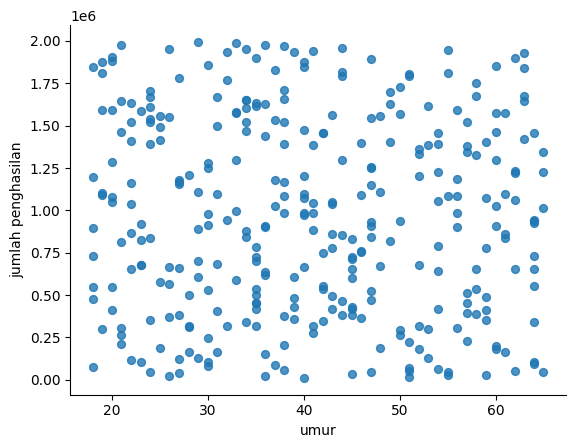

In [33]:
# @title umur vs jumlah penghasilan

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='umur', y='jumlah penghasilan', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)